In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

---
# Carregamento, preparação e visualização de dados
---

In [81]:
# Gerando dados fictícios (100 amostras com adição de ruído):

np.random.seed(0)

data = np.sin(np.linspace(0,20,100)) * 10 + 25 + np.random.normal(0,1,100)

In [82]:
# Gerando o DataFrame dos dados

df = pd.DataFrame(data, columns = ["Temperatura"])

df.head()

,Temperatura
0,26.764052
1,27.406646
2,29.910104
3,32.937234
4,34.097184


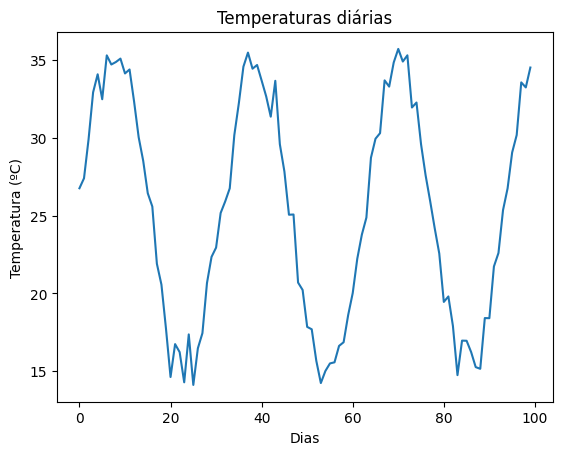

In [83]:
# Visualização:

plt.plot(df)
plt.title("Temperaturas diárias")
plt.xlabel("Dias")
plt.ylabel("Temperatura (ºC)")
plt.show()

---
# Pré-processamento dos dados
---

In [84]:
# Escolhendo o tamanho do treino e do teste
train = df.iloc[:90]
test = df.iloc[90:]

# Normalizando valores
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaler.fit(test)
scaled_test = scaler.transform(test)

# Janela deslizante
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 30
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

# Definindo o modelo
model = Sequential()
model.add(LSTM(100, activation = "relu", input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.fit(generator, epochs = 50)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2127
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0908
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0794
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0624
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0342
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0108
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0270
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0038
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0025
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0030
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0035
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0043
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0024
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0028
Epoch 16/50
60/

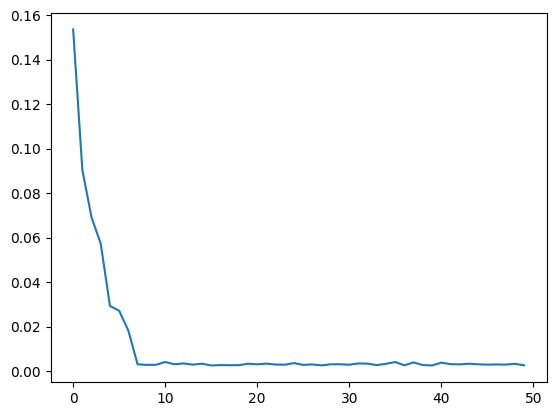

In [88]:
loss_per_epoch = model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [98]:
last_train_batch = scaled_train[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[0.16721626]], dtype=float32)

In [101]:
scaled_test[0]

array([0.])

In [91]:
test_predctions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]

    test_predctions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [92]:
test_predctions

[array([0.16721626], dtype=float32),
 array([0.22285566], dtype=float32),
 array([0.2888425], dtype=float32),
 array([0.36260596], dtype=float32),
 array([0.44197834], dtype=float32),
 array([0.52255], dtype=float32),
 array([0.6026426], dtype=float32),
 array([0.67890376], dtype=float32),
 array([0.7457613], dtype=float32),
 array([0.7998923], dtype=float32)]

<ipython-input-93-4eeece6866f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = tramsformed_predctions


<Axes: >

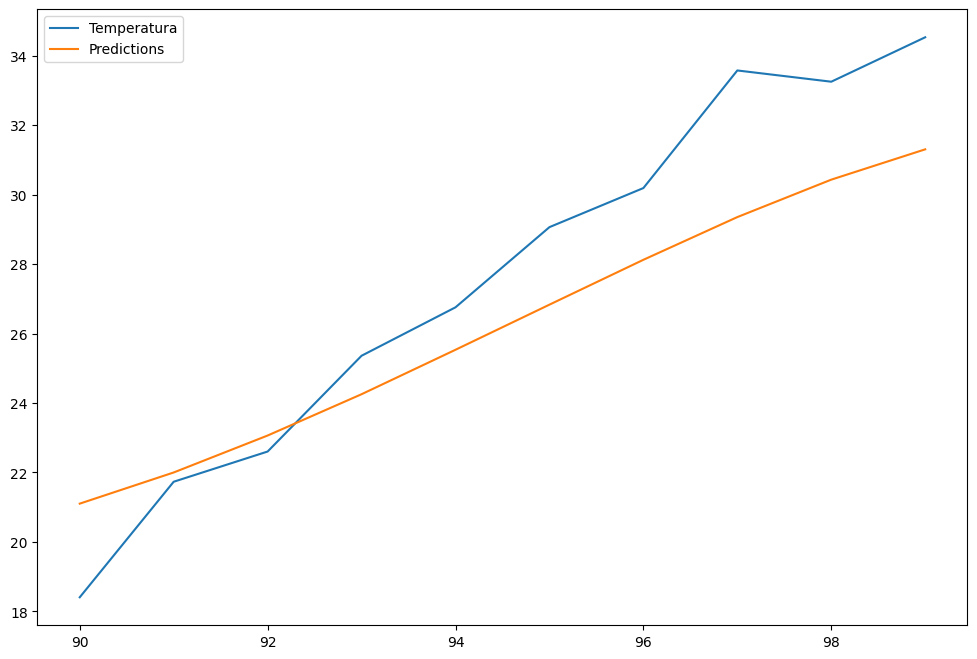

In [93]:
tramsformed_predctions = scaler.inverse_transform(test_predctions)
test['Predictions'] = tramsformed_predctions
test.plot(figsize = (12,8))